In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [2]:
train = pd.read_csv("data/esteban/train_limpio_pobidz.csv")
test = pd.read_csv("data/esteban/test_limpio_pobidz.csv")

#col_train = pd.read_csv("data/ftr_poblacion_train.csv")
#col_test = pd.read_csv("data/ftr_poblacion_test.csv")

In [3]:
#train = reduce_mem_usage(train)
#test = reduce_mem_usage(test)

In [4]:
X, y = train.drop(["precio"] , axis=1),train["precio"]

In [5]:
scaling = StandardScaler().fit(X)
X2 = scaling.transform(X)
X2 = pd.DataFrame(data = X2, columns = X.columns)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [7]:
%%time

# 636 000 con ciudades
# 10 min
#reg = MLPRegressor(max_iter = 1000, learning_rate_init = 0.0002, activation='logistic'

#hidden_layer_sizes=(948,100)
reg = MLPRegressor(max_iter = 1000, learning_rate_init = 0.0001, activation='logistic')
y_train_l = np.log(y_train)


reg.fit(X_train, y_train_l)
pred = reg.predict(X_test)
pred = np.exp(pred)

round(mean_absolute_error(y_test, pred))

Wall time: 9min 51s


636414.0072797175

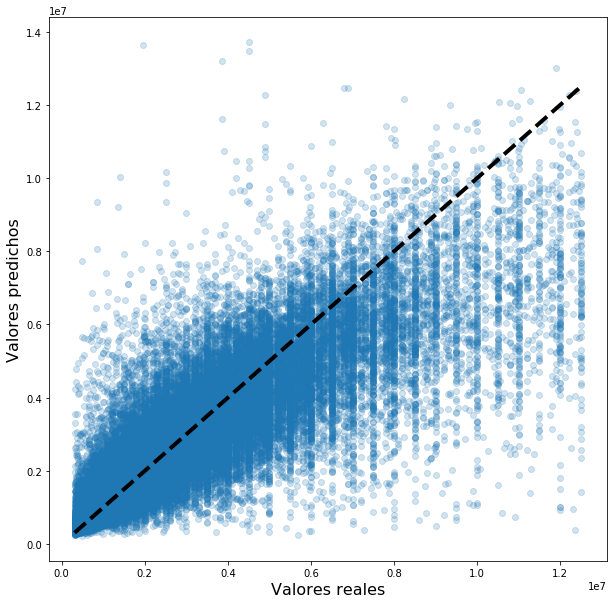

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred, alpha = 0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);